In [54]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [55]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\juanj\OneDrive\Documentos\GitHub\CD\Projeto 01


In [56]:
dados2015=pd.read_table("PNAD DOM2015\\DOM2015csv\\DOM2015.csv", encoding="windows-1252", sep=",")

In [57]:
dados2015.shape

(151189, 81)

In [58]:
# SEPARANDO OS DOMICILIOS POR REGIOES
dados2015.shape
dados2015.loc[(dados2015.UF>10)&(dados2015.UF<20),"REGIAO"] = "Norte"
dados2015.loc[(dados2015.UF>20)&(dados2015.UF<30),"REGIAO"] = "Nordeste"
dados2015.loc[(dados2015.UF>40)&(dados2015.UF<44),"REGIAO"] = "Sul"
dados2015.loc[(dados2015.UF>30)&(dados2015.UF<35),"REGIAO"] = "Sudeste"
dados2015.loc[(dados2015.UF>49)&(dados2015.UF<54),"REGIAO"] = "Centro-Oeste"
dados2015.head(5)

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4614,UPA,V4617,V4618,V4620,V4621,V4622,V4624,V9992,REGIAO
0,0,2015,11,15,1,1,1.0,1.0,1.0,4.0,...,800.0,191,110001,1,1.0,800.0,4.0,1.0,20161104,Norte
1,1,2015,11,15,2,6,NaN,NaN,NaN,NaN,...,NaN,191,110001,1,NaN,NaN,NaN,NaN,20161104,Norte
2,2,2015,11,15,3,1,1.0,1.0,1.0,4.0,...,1150.0,191,110001,1,1.0,1150.0,4.0,1.0,20161104,Norte
3,3,2015,11,15,4,1,6.0,4.0,1.0,2.0,...,4760.0,191,110001,1,6.0,793.0,4.0,2.0,20161104,Norte
4,4,2015,11,15,5,1,2.0,2.0,1.0,2.0,...,5800.0,191,110001,1,2.0,2900.0,6.0,2.0,20161104,Norte


In [59]:
#CRIANDO UM FILTRO PARA REGIÕES URBANAS E RURAIS

dados2015.loc[(dados2015.V4105>=1)&(dados2015.V4105<=3),"URBANIZACAO"] = "Urbana"
dados2015.loc[(dados2015.V4105>3)&(dados2015.V4105<=8),"URBANIZACAO"] = "Rural"


In [120]:
# CRIANDO UM FILTRO PARA RENDIMENTO DOMICILIAR

# dados2015.loc[(dados2015.V4614>=1)&(dados2015.V4614<=500),"RENDA"] = "Até R$500"
# dados2015.loc[(dados2015.V4614>500)&(dados2015.V4614<=1000),"RENDA"] = "Entre R$500 e R$1000"
# dados2015.loc[(dados2015.V4614>1000)&(dados2015.V4614<=2000),"RENDA"] = "Entre R$1.000 e R$2.000"
# dados2015.loc[(dados2015.V4614>2000)&(dados2015.V4614<=3000),"RENDA"] = "Entre R$2.000 e R$3.000"
# dados2015.loc[(dados2015.V4614>3000)&(dados2015.V4614<=5000),"RENDA"] = "Entre R$3.000 e R$5.000"
# dados2015.loc[(dados2015.V4614>5000)&(dados2015.V4614<=10000),"RENDA"] = "Entre R$5.000 e R$10.000"
# dados2015.loc[(dados2015.V4614>10000),"RENDA"] = "Maior que R$10.000"
dados2015 = dados2015.rename(columns = {"V4614":"RENDA"})

In [87]:
# CRIANDO UM FILTRO PARA RENDIMENTO MENSAL DOMICILIAR EM SALARIOS MINIMOS 

dados2015.loc[(dados2015.RENDA>=1)&(dados2015.RENDA<=(937*(1/2))),"SALARIOS MINIMOS"] = "1/2 salarios"
dados2015.loc[(dados2015.RENDA>(937*(1/2)))&(dados2015.RENDA<=937),"SALARIOS MINIMOS"] = "Entre 1/2 e 1 salario"
dados2015.loc[(dados2015.RENDA>937)&(dados2015.RENDA<=937*2),"SALARIOS MINIMOS"] = "Entre 1 e 2 salarios"
dados2015.loc[(dados2015.RENDA>937*2)&(dados2015.RENDA<=937*3),"SALARIOS MINIMOS"] = "Entre 2 e 3 salarios"
dados2015.loc[(dados2015.RENDA>937*3)&(dados2015.RENDA<=937*5),"SALARIOS MINIMOS"] = "Entre 3 e 5 salarios"
dados2015.loc[(dados2015.RENDA>937*5)&(dados2015.RENDA<=937*10),"SALARIOS MINIMOS"] = "Entre 5 e 10 salarios"
dados2015.loc[(dados2015.RENDA>937*10),"SALARIOS MINIMOS"] = "Mais que 10 salarios"


In [88]:
# CRIANDO UM FILTRO PARA AS PESSOAS QUE TEM ACESSO A INTERNET NO PROPRIO DOMICILIO

dados2015.loc[(dados2015.V02322 == 2),"ACESSO A INTERNET"] = "Sim"
dados2015.loc[(dados2015.V02322 == 4),"ACESSO A INTERNET"] = "Nao"

In [89]:
# CRIANDO UM FILTRO PARA AS PESSOAS QUE TEM ACESSO A CELULAR NO PROPRIO DOMICILIO

dados2015.loc[(dados2015.V0220 == 2),"ACESSO A CELULAR"] = "Sim"
dados2015.loc[(dados2015.V0220 == 4),"ACESSO A CELULAR"] = "Nao"

In [90]:
dados2015["ACESSO A CELULAR"].value_counts()


Sim    107849
Nao      9752
Name: ACESSO A CELULAR, dtype: int64

In [91]:
dados_interesse = dados2015.loc[:, ["REGIAO","URBANIZACAO","RENDA","SALARIOS MINIMOS","ACESSO A INTERNET","ACESSO A CELULAR"]]

In [92]:
dados_interesse

,REGIAO,URBANIZACAO,RENDA,SALARIOS MINIMOS,ACESSO A INTERNET,ACESSO A CELULAR
0,Norte,Urbana,8.000000e+02,Entre 1/2 e 1 salario,Nao,Sim
1,Norte,Urbana,NaN,NaN,NaN,NaN
2,Norte,Urbana,1.150000e+03,Entre 1 e 2 salarios,Sim,Sim
3,Norte,Urbana,4.760000e+03,Entre 5 e 10 salarios,Sim,Sim
4,Norte,Urbana,5.800000e+03,Entre 5 e 10 salarios,Nao,Sim
5,Norte,Urbana,1.990000e+03,Entre 2 e 3 salarios,Sim,Nao
6,Norte,Urbana,7.000000e+02,Entre 1/2 e 1 salario,Nao,Sim
7,Norte,Urbana,4.000000e+03,Entre 3 e 5 salarios,Nao,Sim
8,Norte,Urbana,4.090000e+03,Entre 3 e 5 salarios,Sim,Sim
9,Norte,Urbana,NaN,NaN,NaN,NaN


In [118]:
(dados_interesse.RENDA).round(decimals=1)

0         8.000000e+02
1                  NaN
2         1.150000e+03
3         4.760000e+03
4         5.800000e+03
5         1.990000e+03
6         7.000000e+02
7         4.000000e+03
8         4.090000e+03
9                  NaN
10        5.150000e+03
11        2.500000e+03
12                 NaN
13        2.800000e+03
14                 NaN
15        2.000000e+03
16        7.880000e+02
17        3.000000e+03
18        7.188000e+03
19        1.200000e+03
20        2.800000e+03
21        4.350000e+03
22                 NaN
23        8.000000e+03
24                 NaN
25                 NaN
26        2.100000e+03
27        1.330000e+04
28        7.000000e+03
29        4.688000e+03
              ...     
151159    1.820000e+04
151160             NaN
151161    3.100000e+04
151162             NaN
151163    1.250000e+04
151164    3.000000e+04
151165    3.040000e+04
151166             NaN
151167    3.750000e+04
151168    3.970000e+04
151169    3.170000e+04
151170    3.064000e+04
151171    1

In [83]:
! explorer .


In [84]:
dados_interesse.dropna(axis = 0)

,REGIAO,URBANIZACAO,RENDA,SALARIOS MINIMOS,ACESSO A INTERNET,ACESSO A CELULAR
0,Norte,Urbana,8.000000e+02,Entre 1/2 e 1 salario,Nao,Sim
2,Norte,Urbana,1.150000e+03,Entre 1 e 2 salarios,Sim,Sim
3,Norte,Urbana,4.760000e+03,Entre 5 e 10 salarios,Sim,Sim
4,Norte,Urbana,5.800000e+03,Entre 5 e 10 salarios,Nao,Sim
5,Norte,Urbana,1.990000e+03,Entre 2 e 3 salarios,Sim,Nao
6,Norte,Urbana,7.000000e+02,Entre 1/2 e 1 salario,Nao,Sim
7,Norte,Urbana,4.000000e+03,Entre 3 e 5 salarios,Nao,Sim
8,Norte,Urbana,4.090000e+03,Entre 3 e 5 salarios,Sim,Sim
10,Norte,Urbana,5.150000e+03,Entre 5 e 10 salarios,Sim,Sim
11,Norte,Urbana,2.500000e+03,Entre 2 e 3 salarios,Sim,Sim


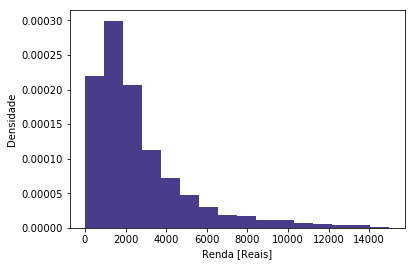

In [151]:
# Separando faixas iguais de renda em salarios minimos

faixa = np.arange(0,15000,937)
sal_min = pd.cut(dados_interesse.RENDA,faixa)
#sal_min.value_counts()
plot = dados_interesse.RENDA.plot.hist(bins=faixa, normed = True,color="darkslateblue")
plt.xlabel("Renda [Reais]")
plt.ylabel("Densidade")

In [167]:
sal_min.value_counts()
sal_net=pd.crosstab(sal_min,dados_interesse["REGIAO"],normalize = True)
b=sal_net.sum().sum()
sal_net*100/b

REGIAO,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
RENDA,,,,,
"(0, 937]",1.575725,10.198691,4.150909,3.505613,1.988915
"(937, 1874]",2.975369,10.287732,5.360466,5.982752,4.397023
"(1874, 2811]",2.533165,5.299438,2.897333,4.557096,3.960822
"(2811, 3748]",1.371631,2.194009,1.395642,2.606199,2.593193
"(3748, 4685]",1.041479,1.254577,0.826380,1.567721,1.792825
"(4685, 5622]",0.647298,0.759349,0.524241,1.014467,1.154531
"(5622, 6559]",0.418192,0.505232,0.339156,0.618284,0.738340
"(6559, 7496]",0.283130,0.290133,0.215099,0.425196,0.441203
"(7496, 8433]",0.276127,0.250115,0.186086,0.364168,0.391180


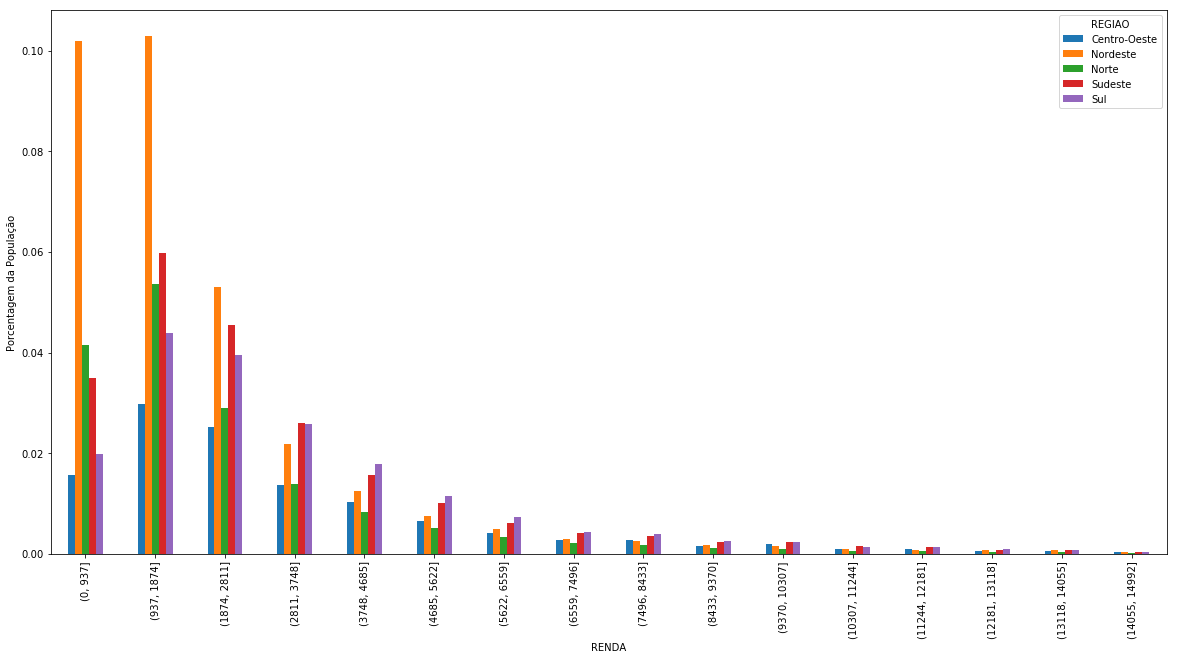

In [173]:

sal_net.plot(kind="bar", figsize=(20, 10))
plt.ylabel("Porcentagem da População")

In [ ]:
dados_interesse.to_csv("filtrado.csv")